<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/2024_06_25_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans Clustering

K-means clustering is an example of a model that is not trained. So, there is no training set, which is
called an unsupervised model, meaning without labels. K-means clustering is a type of classification
problem. The goal is to put data into groups by something they have in common, meaning put them in
clusters. Example use cases are:

• Recommending videos on TikTok or YouTube
• High credit risk borrowers
• popular social media influencers
• finding spambots


![](https://raw.githubusercontent.com/werowe/HypatiaAcademy/master/images/kmeans-clustering.png)



$$\huge \sqrt{(a - b)^2}$$



![](https://raw.githubusercontent.com/werowe/HypatiaAcademy/master/images/distance-between-points.png)


$$\huge a = (x1,y1)$$
$$\huge b = (x2, y2)$$

Pythagorean theorem

$$\huge a^2 + b^2 = c^2$$


$$\huge height = y2 - y1$$

$$\huge base = x2 -  x1 $$

length of distance ab:

$$\huge \sqrt{(y2 - y1)^2 + (x2 - x1)^2}$$

In [104]:




import numpy as np
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans



**Do we need Y?**

The y values generated by make_blobs represent the true labels of the clusters and are typically used for evaluating the performance of clustering algorithms. However, the KMeans algorithm itself does not require the y values to calculate the clusters. KMeans is an unsupervised learning algorithm, meaning it only needs the input data X to find the clusters.

The y values are useful if you want to assess the quality of the clustering using metrics such as the Adjusted Rand Index (ARI) or Normalized Mutual Information (NMI). These metrics compare the clusters found by the algorithm to the true clusters.

In [105]:
!ls sample_data/

anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


In [106]:


import pandas as pd


df=pd.read_csv('sample_data/california_housing_test.csv')


df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


<Axes: xlabel='longitude', ylabel='latitude'>

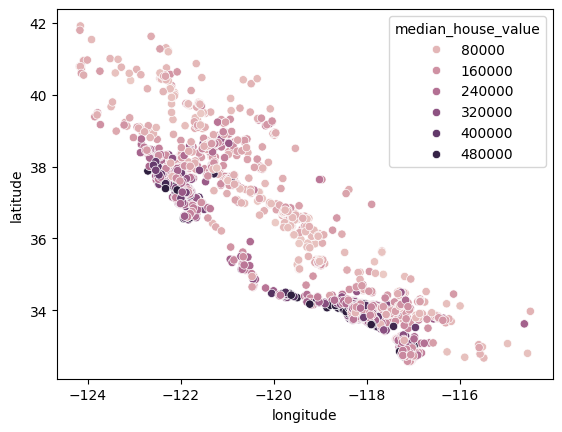

In [107]:

import seaborn as sns

data=df.loc[:,['longitude', 'latitude', 'median_house_value']]

sns.scatterplot(data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

In [108]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

origdf=df.copy()


df.drop('longitude', axis=1,inplace=True)
df.drop('latitude', axis=1,inplace=True)

X=df.to_numpy()

scaler = MinMaxScaler()
X = scaler.fit_transform(X)


model = KMeans(n_clusters=7, random_state=42)
model.fit(X)

print(model.labels_)
print(model.cluster_centers_)





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[5 6 5 ... 4 6 2]
[[0.21795495 0.30730858 0.33588931 0.37598179 0.32688399 0.25448102
  0.36620582]
 [0.59108076 0.06697222 0.08310639 0.11218663 0.08655349 0.19102709
  0.2897191 ]
 [0.60895141 0.10443451 0.09858738 0.10296913 0.10100314 0.45767645
  0.93420994]
 [0.83160004 0.06598312 0.07770096 0.08588775 0.08131346 0.24773011
  0.57554074]
 [0.28356676 0.08340596 0.09874557 0.11233505 0.09625142 0.18105641
  0.21797777]
 [0.3601047  0.10193085 0.10377556 0.12413061 0.10807098 0.32610751
  0.54865022]
 [0.82635427 0.05010596 0.06657517 0.08987224 0.0686715  0.12802186
  0.19741462]]


In [109]:
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...
2995,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


**Elbow Method**

there is a another way to do this which is to just let the algorithm pick the number of clusters itself.

often that is the most logical thing to do.  If we pick 7 that's just a guess.





The **Elbow method** is a popular technique to determine the optimal number of clusters for K-means clustering. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and identifying the "elbow point," where the rate of decrease sharply shifts. This point is considered indicative of the optimal number of clusters.

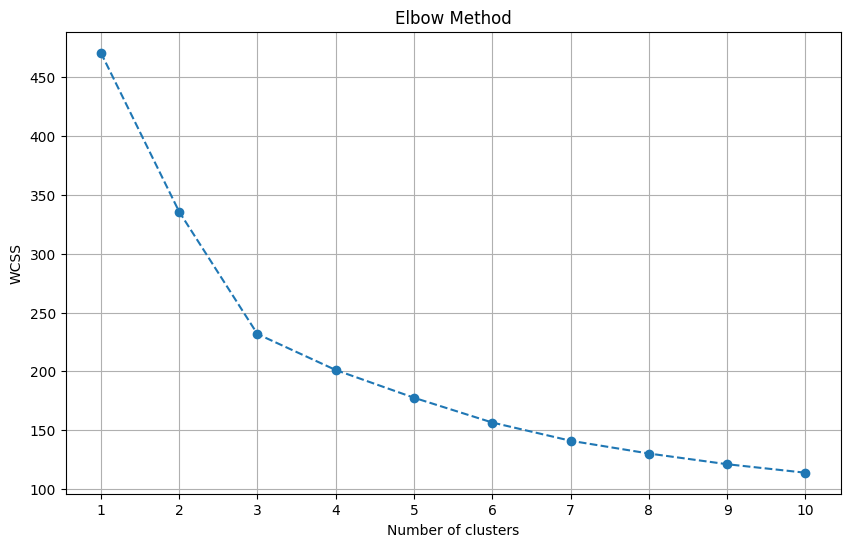

In [110]:
import matplotlib.pyplot as plt

# Assuming X is your data matrix
wcss= []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [111]:
!pip install kneed

In [112]:
from kneed import KneeLocator

# Using KneeLocator to find the elbow point
kneedle = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
elbow_point = kneedle.elbow

print(f"The optimal number of clusters is: {elbow_point}")

The optimal number of clusters is: 3


In [113]:
model = KMeans(n_clusters=elbow_point, random_state=42)
model.fit(X)

print(model.labels_)
print(model.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 2 ... 1 0 2]
[[0.73158285 0.05772439 0.07261591 0.09717311 0.07557711 0.17418972
  0.28374493]
 [0.31270668 0.10996013 0.12477329 0.14537357 0.12378195 0.21718899
  0.30488194]
 [0.61504674 0.09549757 0.0964599  0.1032545  0.10013004 0.37351602
  0.77812078]]


In [114]:
preds=model.predict(X)

[Boxplot Explained](https://www.simplypsychology.org/boxplots.html)

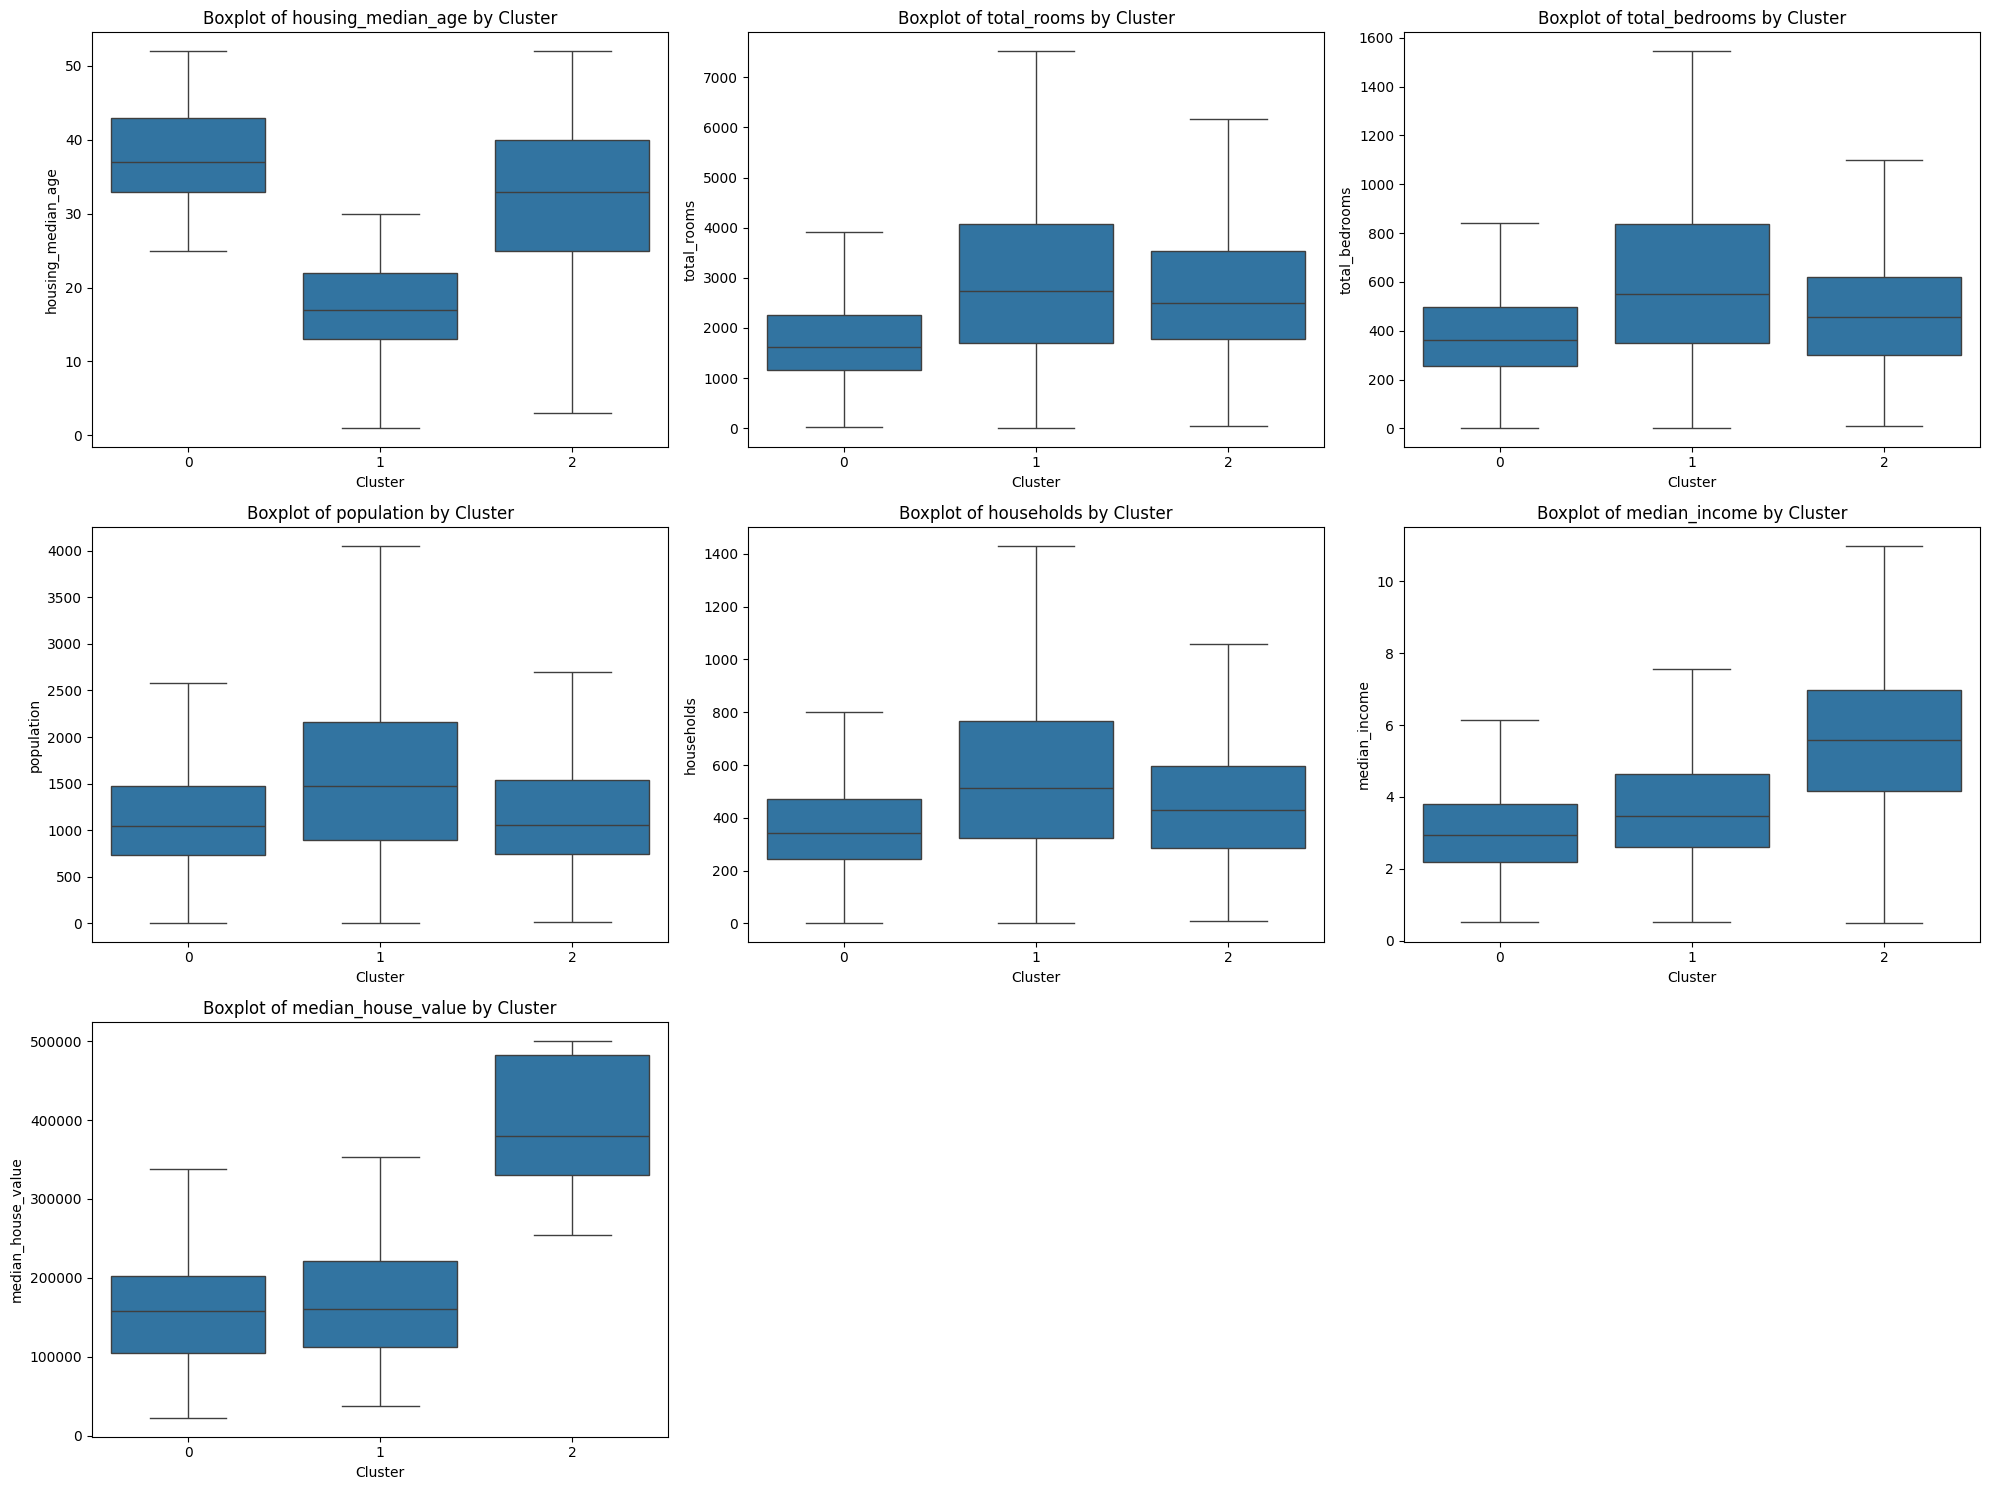

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

origdf.drop("longitude",axis=1,inplace=True)
origdf.drop("latitude",axis=1,inplace=True)

origdf['Cluster'] = preds

#Step 4: Create a boxplot for each feature, grouped by the cluster
num_features = X.shape[1]
num_rows = (num_features + 3) // 3  # Calculate the number of rows needed with 4 plots per row
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(origdf.columns[:-1]):  # Exclude the cluster column
    sns.boxplot(x='Cluster', y=feature, data=origdf, ax=axes[i], showfliers=False)
    axes[i].set_title(f'Boxplot of {feature} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [116]:
origdf

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Cluster
0,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,2
1,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,0
2,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,2
3,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,2
4,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,1
...,...,...,...,...,...,...,...,...
2995,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0,1
2996,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0,1
2997,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0,1
2998,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0,0
